### only modify the cell directly below this. I think I have the rest of the code set up to output the K_b and N_A at the very end. Just modify the variables below this as needed, then click "restart and run all cells". The K_b and N_A will be printed at the very bottom. I need to modify it to also output uncertainty

In [77]:
micronsPerPixel=.16 # for 40x, use .16, idk about other magnifications
framesPerSecond=5 # for 200ms per frame, use 5
temperatureF=72 # I'm assuming room temperature
tracerDiameter=2*10**-6 # 2 micron diameter
pathToFile='../022721_S10.2_1micron_1min.mp4'

In [69]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [3]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open(pathToFile))

C:\Users\oliph\Anaconda3\lib\site-packages\pims\api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
C:\Users\oliph\Anaconda3\lib\site-packages\pims\api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x00000244EEB94378>
Traceback (most recent call last):
  File "C:\Users\oliph\Anaconda3\lib\site-packages\pims\pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


In [4]:
frames

(ImageIOReader,) processed through proc_func. Original repr:
    <FramesSequenceND>
    Axes: 3
    Axis 'x' size: 2044
    Axis 'y' size: 2048
    Axis 't' size: 301
    Pixel Datatype: uint8

Frame([[11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       ...,
       [11, 11, 11, ...,  6,  6,  6],
       [11, 11, 11, ...,  6,  6,  6],
       [11, 11, 11, ...,  6,  6,  6]], dtype=uint8)
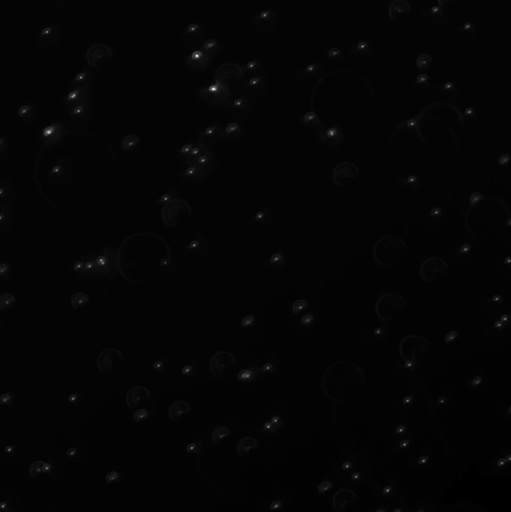

In [5]:
frames[0]

In [6]:
f = tp.locate(frames[0], 71, invert=False)

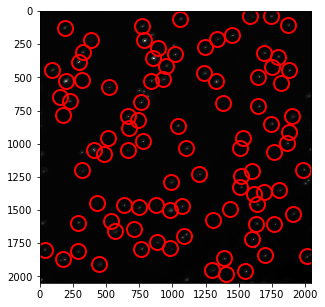

In [7]:
tp.annotate(f, frames[0]);

In [8]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,37.571064,1741.709769,15872.177091,10.214400,0.143838,77.610341,66602.0,0.024367,0
1,36.291195,1583.962144,10136.772884,22.483720,0.392325,24.145439,63186.0,0.027572,0
2,58.760241,1058.319277,17893.495307,9.903340,0.135792,100.893443,69558.0,0.022139,0
3,105.494929,1869.824444,15134.016513,9.197971,0.145666,75.885667,60649.0,0.030558,0
4,113.245683,770.080890,18325.526206,11.034961,0.189409,93.994746,71305.0,0.021004,0
...,...,...,...,...,...,...,...,...,...
90,1871.047048,178.435016,23149.440074,16.712148,0.383268,88.820724,82889.0,0.015676,0
91,1907.052346,449.331449,18911.915450,14.447569,0.172767,45.703868,67167.0,0.023907,0
92,1948.159132,1299.005615,17969.380974,16.243420,0.170727,45.703868,64016.0,0.026718,0
93,1960.298339,1549.122911,16978.555620,9.327877,0.108581,112.103826,60494.0,0.030762,0


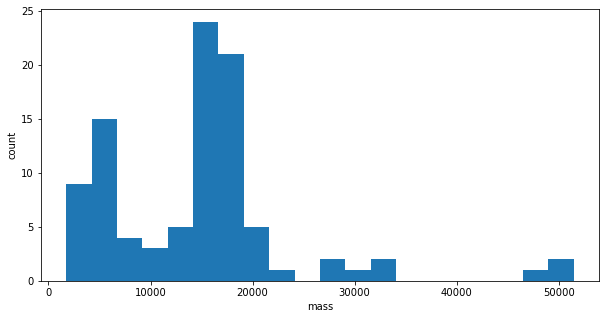

In [9]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [10]:
f = tp.locate(frames[0], 71, invert=False, minmass=5000)

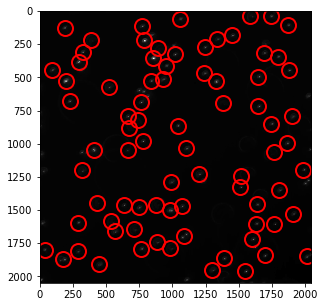

In [11]:
tp.annotate(f, frames[0]);

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

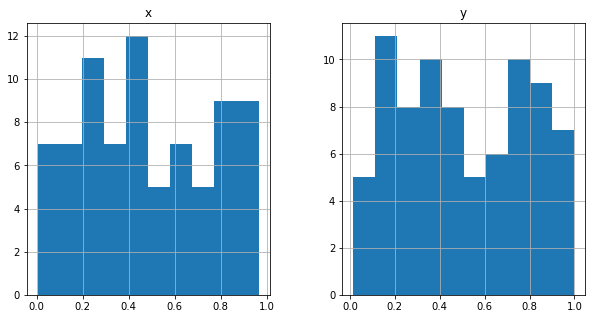

In [12]:
plt.figure()
tp.subpx_bias(f)
plt.show

In [13]:
f = tp.batch(frames, 71, minmass=5000, invert=False);

Frame 299: 78 features


In [14]:
t = tp.link(f, 5, memory=3) # might need to modify the 5, idk what it should be but smaller means quicker computation

Frame 299: 78 trajectories present.


In [15]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 338
After: 200


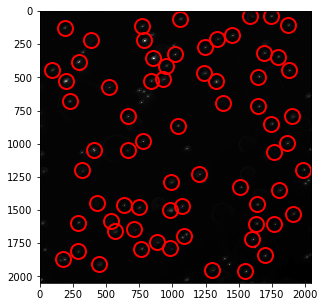

In [16]:
plt.figure()
tp.annotate(t1[t1['frame'] == 0], frames[0]);

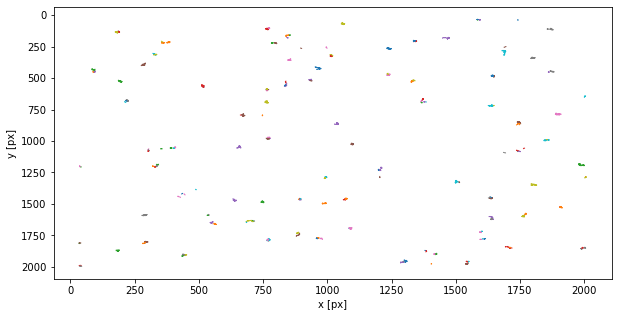

In [17]:
plt.figure()
tp.plot_traj(t1);

In [18]:
d = tp.compute_drift(t1)

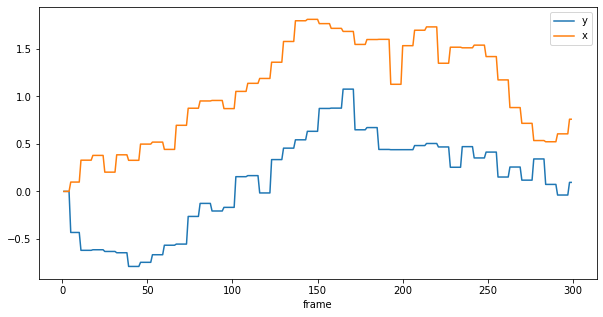

In [19]:
d.plot()
plt.show()

In [20]:
tm = tp.subtract_drift(t1.copy(), d)

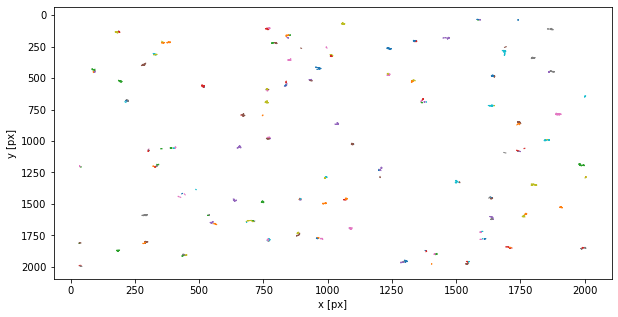

In [21]:
ax = tp.plot_traj(tm)
plt.show()

In [78]:
im = tp.imsd(tm, micronsPerPixel, framesPerSecond)

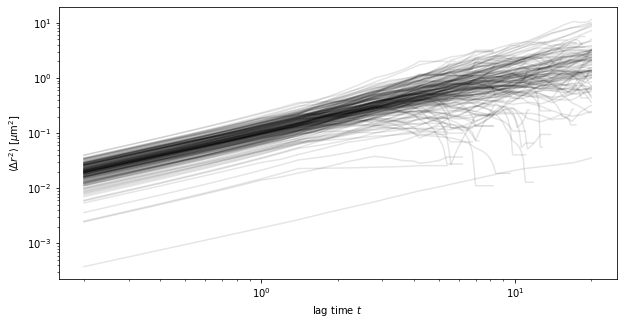

In [79]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [80]:
em = tp.emsd(tm, micronsPerPixel, framesPerSecond)

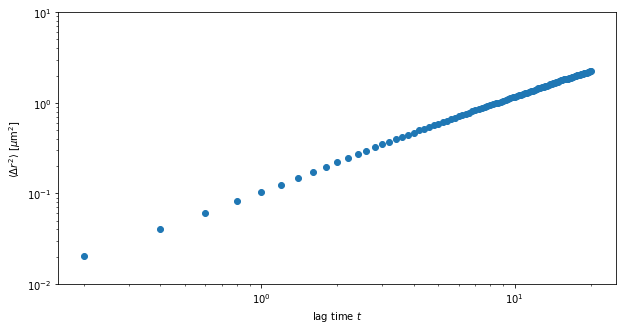

In [81]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

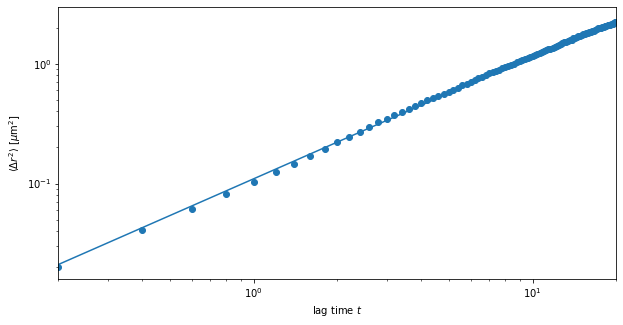

msd    0.109375
Name: A, dtype: float64


In [82]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
x=tp.utils.fit_powerlaw(em).A
print(x)

In [85]:
D=x/2 # diffusion constant
temperatureK=(temperatureF-32)/1.8+273.15
eta=.9954*10**-3 # I'm assuming room temperature, shouldn't make a significant difference
r=tracerDiameter/2
k_b=D/temperatureK*6*np.pi*eta*r
print("K_b: "+str(k_b**2))

K_b: msd    1.206808e-23
Name: A, dtype: float64


In [92]:
R=8.31446261815324
n_a=R/D/6/np.pi/eta/r*temperatureK
print("N_A: "+str(n_a))

N_A: msd    2.393399e+12
Name: A, dtype: float64


In [58]:
print(1.38*10**-23/k_b)

msd    3.972464e-12
Name: A, dtype: float64
